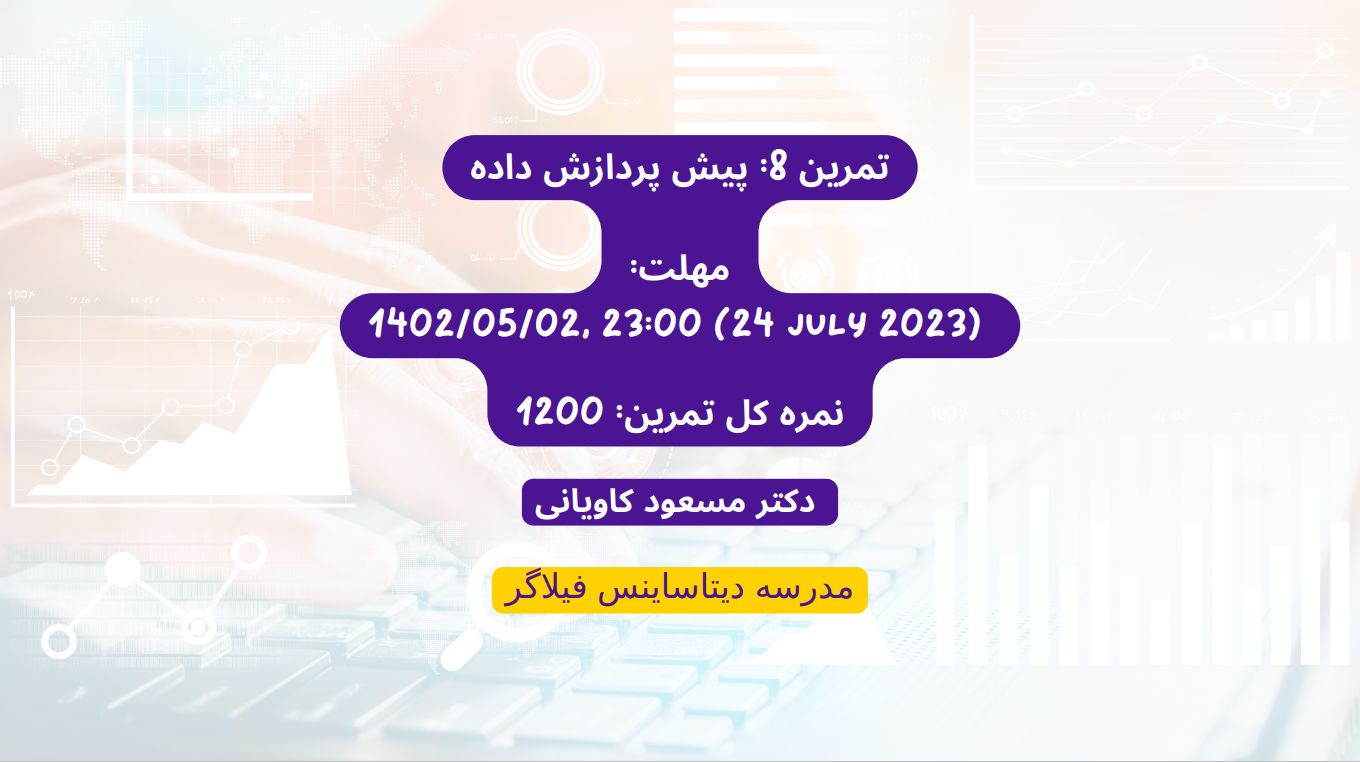
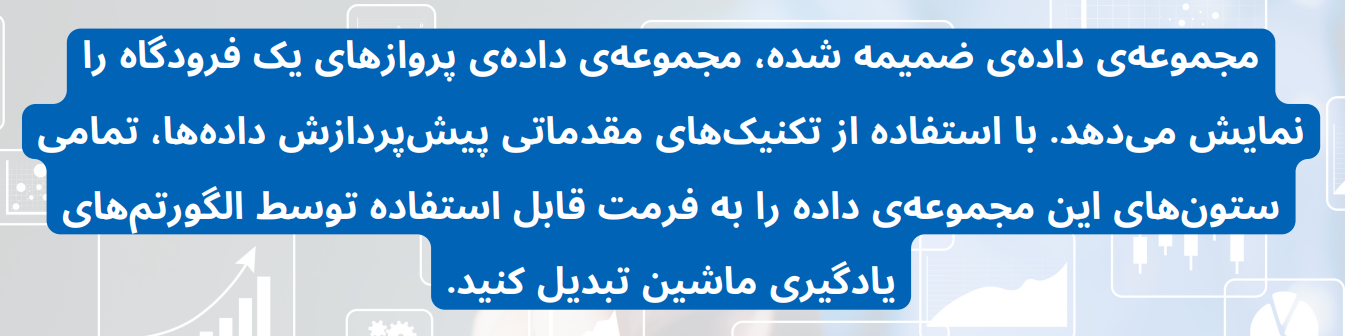

<div style="text-align: center; color: #810541	">
    <h1 style="font-family: 'Calibri', sans-serif; text-align: center; font-size: 50px; margin-top: 0; margin-bottom: 20px; font-weight: bold;">
        Exercise 8 
    </h1> 
</div>

The attached dataset represents a collection of flight data for an airport. Using basic data preprocessing techniques, convert all columns of this dataset into a format usable by machine learning algorithms.

 <div style="background-color: #810541	; text-align: center;">
  <h1 style="color: white;"> 
    Importing Libriries
    </h1>
</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import pickle
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv('flights.csv')

In [3]:
data.shape

(336776, 21)

In [4]:
data.head()

,id,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,...,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,name
0,0,2013,1,1,517.0,515,2.0,830.0,819,11.0,...,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00,United Air Lines Inc.
1,1,2013,1,1,533.0,529,4.0,850.0,830,20.0,...,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00,United Air Lines Inc.
2,2,2013,1,1,542.0,540,2.0,923.0,850,33.0,...,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00,American Airlines Inc.
3,3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,...,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00,JetBlue Airways
4,4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,...,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00,Delta Air Lines Inc.


In [5]:
data.columns

Index(['id', 'year', 'month', 'day', 'dep_time', 'sched_dep_time', 'dep_delay',
       'arr_time', 'sched_arr_time', 'arr_delay', 'carrier', 'flight',
       'tailnum', 'origin', 'dest', 'air_time', 'distance', 'hour', 'minute',
       'time_hour', 'name'],
      dtype='object')

In [6]:
data.isnull().sum()

id                   0
year                 0
month                0
day                  0
dep_time          8255
sched_dep_time       0
dep_delay         8255
arr_time          8713
sched_arr_time       0
arr_delay         9430
carrier              0
flight               0
tailnum           2512
origin               0
dest                 0
air_time          9430
distance             0
hour                 0
minute               0
time_hour            0
name                 0
dtype: int64

 <div style="background-color: #810541	; text-align: center;">
  <h1 style="color: white;"> 
    Data Cleaning
    </h1>
</div>

# Remove unnecessary columns :

<div style="direction:rtl; text-align: right">
ابتدا ستونهایی که اطلاعات مفیدی ارائه نمیکنند را حذف میکنیم :
    1- ستون id که برابر با index است
    2- ستون year به دلیل اینکه تمامی داده ها مربوط به سال 2013 هستند
    3- ستونهای hour و  minute و time_hour و name به دلیل تکراری بودن و اینکه اطلاعات آنها به تفکیک در ستونهای دیگر ارائه شده
    4- ستون flight به دلیل اینکه صرفاً شماره پرواز بوده و اطلاعات مفیدی ارائه نمیکند
    5- ستون tailnum به دلیل اینکه صرفاً شماره هواپیما بوده و اطلاعات مفیدی ارائه نمیکند
    6- ستون dest با توجه به اینکه این ستون غیرعددی است برای تبدیل آن به ستون عددی میتوانیم آن را با مشخصه دیگری مانند مسافت جایگزین کنیم که ستون distance در داده ها موجود است بنابراین میتوانیم این ستون را هم حذف کنیم.
</div>

First, we remove columns that do not provide useful information:

1. The "id" column, which is equivalent to the index.
2. The "year" column, as all data is for the year 2013.
3. The "hour," "minute," "time_hour," and "name" columns due to their redundancy and the fact that their information is provided separately in other columns.
4. The "flight" column, as it only contains flight numbers and does not provide valuable information.
5. The "tailnum" column, as it only contains plain numbers and does not provide valuable information.
6. The "dest" column, since it is non-numeric. We can replace it with another feature, such as "distance," which is already available in the data. Therefore, we can also remove this column.

In [7]:
data.drop(columns=['id','year','hour','minute','time_hour','name','flight','tailnum','dest'], inplace=True)

In [8]:
data.shape

(336776, 12)

In [9]:
data.tail()

,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,origin,air_time,distance
336771,9,30,NaN,1455,NaN,NaN,1634,NaN,9E,JFK,NaN,213
336772,9,30,NaN,2200,NaN,NaN,2312,NaN,9E,LGA,NaN,198
336773,9,30,NaN,1210,NaN,NaN,1330,NaN,MQ,LGA,NaN,764
336774,9,30,NaN,1159,NaN,NaN,1344,NaN,MQ,LGA,NaN,419
336775,9,30,NaN,840,NaN,NaN,1020,NaN,MQ,LGA,NaN,431


 <div style="background-color: #810541	; text-align: center;">
  <h1 style="color: white;"> 
    Preprocessing 
    </h1>
</div>

# 1.Missing Values :

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   month           336776 non-null  int64  
 1   day             336776 non-null  int64  
 2   dep_time        328521 non-null  float64
 3   sched_dep_time  336776 non-null  int64  
 4   dep_delay       328521 non-null  float64
 5   arr_time        328063 non-null  float64
 6   sched_arr_time  336776 non-null  int64  
 7   arr_delay       327346 non-null  float64
 8   carrier         336776 non-null  object 
 9   origin          336776 non-null  object 
 10  air_time        327346 non-null  float64
 11  distance        336776 non-null  int64  
dtypes: float64(5), int64(5), object(2)
memory usage: 30.8+ MB


In [11]:
data.isnull().sum()

month                0
day                  0
dep_time          8255
sched_dep_time       0
dep_delay         8255
arr_time          8713
sched_arr_time       0
arr_delay         9430
carrier              0
origin               0
air_time          9430
distance             0
dtype: int64

<div style="direction:rtl; text-align: right">
 تعداد 9430 عدد از داده های ستون تارگت (arr_delay) فاقد مقدار (null) هستند، که حدود 2/8 درصد از کل داده ها را تشکیل می دهد. با توجه به تعداد کم این داده ها نسبت به کل مجموعه داده ، ابتدا آنها را حذف می کنیم. 
</div>

There are 9,430 entries in the target column (arr_delay) that are missing values (null), which accounts for approximately 2.8% of the total data. Due to the small number of these missing data compared to the entire dataset, we will first remove them."

In [12]:
data.dropna(axis=0, subset=['arr_delay'], inplace=True)

In [13]:
data.shape

(327346, 12)

In [14]:
data.isnull().sum()

month             0
day               0
dep_time          0
sched_dep_time    0
dep_delay         0
arr_time          0
sched_arr_time    0
arr_delay         0
carrier           0
origin            0
air_time          0
distance          0
dtype: int64

# 2.Converting Categorical to Numeric :

In [15]:
Y = data['arr_delay']                   # Target
X = data.drop('arr_delay', axis = 1)    # Independent variables
X.head()

,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,carrier,origin,air_time,distance
0,1,1,517.0,515,2.0,830.0,819,UA,EWR,227.0,1400
1,1,1,533.0,529,4.0,850.0,830,UA,LGA,227.0,1416
2,1,1,542.0,540,2.0,923.0,850,AA,JFK,160.0,1089
3,1,1,544.0,545,-1.0,1004.0,1022,B6,JFK,183.0,1576
4,1,1,554.0,600,-6.0,812.0,837,DL,LGA,116.0,762


In [16]:
X.nunique()

month               12
day                 31
dep_time          1317
sched_dep_time    1020
dep_delay          526
arr_time          1410
sched_arr_time    1162
carrier             16
origin               3
air_time           509
distance           213
dtype: int64

In [17]:
le = LabelEncoder()

In [18]:
############### Changing Data Type of Independent Variables into numpy array  ###############

X = np.array(X)
X

array([[1, 1, 517.0, ..., 'EWR', 227.0, 1400],
       [1, 1, 533.0, ..., 'LGA', 227.0, 1416],
       [1, 1, 542.0, ..., 'JFK', 160.0, 1089],
       ...,
       [9, 30, 2241.0, ..., 'JFK', 47.0, 264],
       [9, 30, 2307.0, ..., 'JFK', 33.0, 187],
       [9, 30, 2349.0, ..., 'JFK', 196.0, 1617]], dtype=object)

In [19]:
type(X)

numpy.ndarray

In [20]:
######################## Coding Categorical Data   #############################

le = LabelEncoder() 

X[:, -3] = le.fit_transform(X[:,-3])
X[:, -4] = le.fit_transform(X[:,-4])

X

array([[1, 1, 517.0, ..., 0, 227.0, 1400],
       [1, 1, 533.0, ..., 2, 227.0, 1416],
       [1, 1, 542.0, ..., 1, 160.0, 1089],
       ...,
       [9, 30, 2241.0, ..., 1, 47.0, 264],
       [9, 30, 2307.0, ..., 1, 33.0, 187],
       [9, 30, 2349.0, ..., 1, 196.0, 1617]], dtype=object)

In [21]:
encoder = OneHotEncoder()

ct = ColumnTransformer(
    transformers=[
        ('Carrier', encoder, [-4]),
        ('Origin', encoder, [-3])
    ],
    remainder='passthrough'
)

X = ct.fit_transform(X)
X

array([[0.0, 0.0, 0.0, ..., 819, 227.0, 1400],
       [0.0, 0.0, 0.0, ..., 830, 227.0, 1416],
       [0.0, 1.0, 0.0, ..., 850, 160.0, 1089],
       ...,
       [0.0, 0.0, 0.0, ..., 1, 47.0, 264],
       [0.0, 0.0, 0.0, ..., 2358, 33.0, 187],
       [0.0, 0.0, 0.0, ..., 350, 196.0, 1617]], dtype=object)

In [22]:
X.shape

(327346, 28)

In [23]:
with open('Col_Transformer.h5', 'wb') as f:
    pickle.dump(ct, f)

# 3.Scaling :

In [24]:
ss = StandardScaler()
X = ss.fit_transform(X)

In [25]:
X

array([[-0.23617312, -0.3288596 , -0.04658976, ..., -1.43337237,
         0.81454838,  0.47781648],
       [-0.23617312, -0.3288596 , -0.04658976, ..., -1.41128305,
         0.81454838,  0.49955835],
       [-0.23617312,  3.04081129, -0.04658976, ..., -1.37112067,
         0.09941   ,  0.05520897],
       ...,
       [-0.23617312, -0.3288596 , -0.04658976, ..., -3.07601401,
        -1.10671891, -1.065856  ],
       [-0.23617312, -0.3288596 , -0.04658976, ...,  1.65712335,
        -1.25615081, -1.17048873],
       [-0.23617312, -0.3288596 , -0.04658976, ..., -2.37518035,
         0.48366345,  0.77269054]])

In [26]:
with open('Std_Scaler.h5', 'wb') as f:
    pickle.dump(ss, f)